## Deepmalya Dutta | MDS202218

### 1. Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from spacy.lang.en import stop_words
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.model_selection import train_test_split

### 2. Importing the datasets

In [2]:
emails = pd.read_csv("./Datasets/emails.csv")
emails.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
# Class count
emails.groupby("spam").count()

,text
spam,
0,4360
1,1368


### 3. EDA

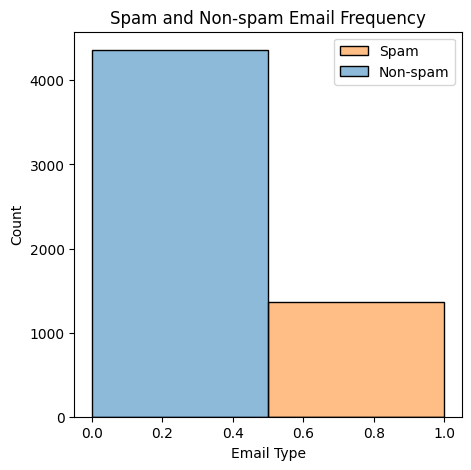

In [4]:
plt.figure(figsize = (5,5))
sns.histplot(data = emails, x = 'spam', hue='spam', bins = 2)
plt.xlabel("Email Type")
plt.title("Spam and Non-spam Email Frequency")
plt.legend(["Spam","Non-spam"])
plt.show()

### 4. Preprocessing the texts

In [5]:
# Removing "Subject:"
emails.text = emails.text.astype(str).map(lambda x:x[9:])

In [6]:
# lowercase, punctuation, removing numbers, emails, urls and special characters
emails.text = emails.text.str.replace('\d', '')
emails.text = emails.text.astype(str).map(lambda x:re.sub(r'http\S+', '', x))
emails.text = emails.text.astype(str).map(lambda x:re.sub(r"\S*@\S*\s?",'', x))
emails.text = emails.text.astype(str).map(lambda x:re.sub('\W+',' ', x))
emails.text = emails.text.map(lambda x:x.lower())
emails.text = emails.text.map(lambda x:x.translate(str.maketrans('', '', string.punctuation)))

/var/folders/r9/gv25zd3n48lcc7_tk4cthcf40000gn/T/ipykernel_3407/1687836251.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  emails.text = emails.text.str.replace('\d', '')


In [7]:
# removing stopwords such as prepositions
stop_words = stop_words.STOP_WORDS
emails.text = emails.text.map(lambda x: " ".join(_ for _ in x.split() if _ not in stop_words))

In [8]:
# lemmatizing the words
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
emails.text = emails.text.map(lambda x: " ".join(lemmatizer.lemmatize(_) for _ in x.split()))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/deepmalya/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
# removing words of size 1
combined_text = " ".join(emails.text)
vocab = Counter(combined_text.split())
new_sw = list({key: value for key, value in vocab.items() if len(key) == 1}.keys())
emails.text = emails.text.map(lambda x: " ".join(_ for _ in x.split() if _ not in new_sw))

In [10]:
emails.head(5)

,text,spam
0,naturally irresistible corporate identity lt h...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new home easy im wanting homeowne...,1
3,color printing special request additional info...,1
4,money software cd software compatibility ain g...,1


### 5. Splitting train, test and validation data

In [11]:
X, y = emails.text, emails.spam
train_X, test_X, train_y, test_y = train_test_split(X, y, shuffle=True, train_size=0.8)

In [12]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, shuffle=True, train_size=0.8)

### 6. Saving train, test and validation data

In [13]:
train_data = pd.concat([train_X, train_y], axis=1)
train_data.to_csv('./Datasets/train.csv', index=False)

test_data = pd.concat([test_X, test_y], axis=1)
test_data.to_csv('./Datasets/test.csv', index=False)

val_data = pd.concat([val_X, val_y], axis=1)
val_data.to_csv('./Datasets/validation.csv', index=False)